/tmp/ipython-input-3934896492.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/crash_data.csv")
/tmp/ipython-input-3934896492.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], errors='coerce')


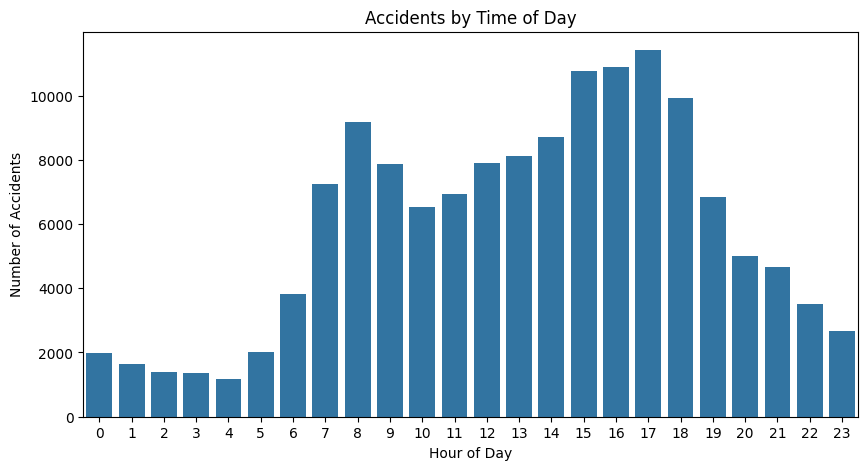

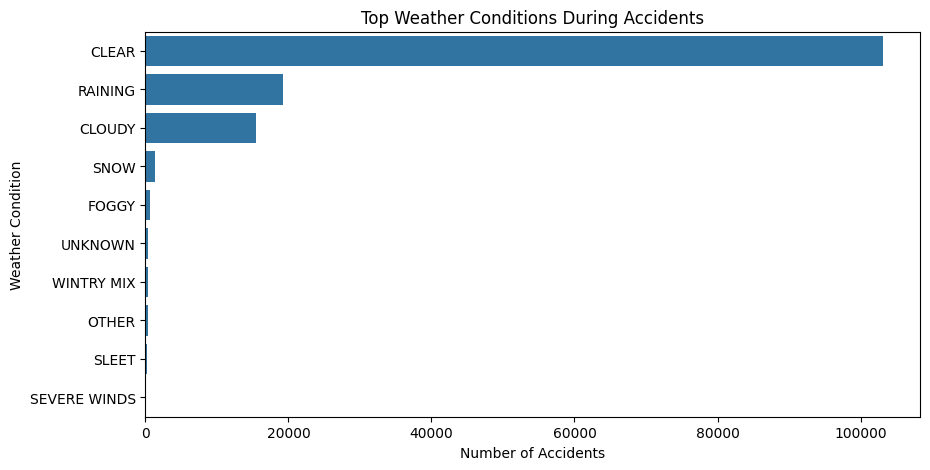

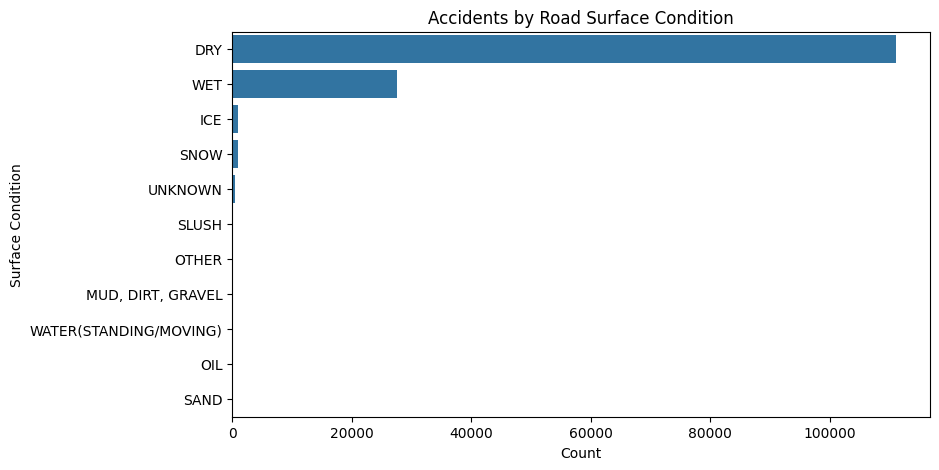

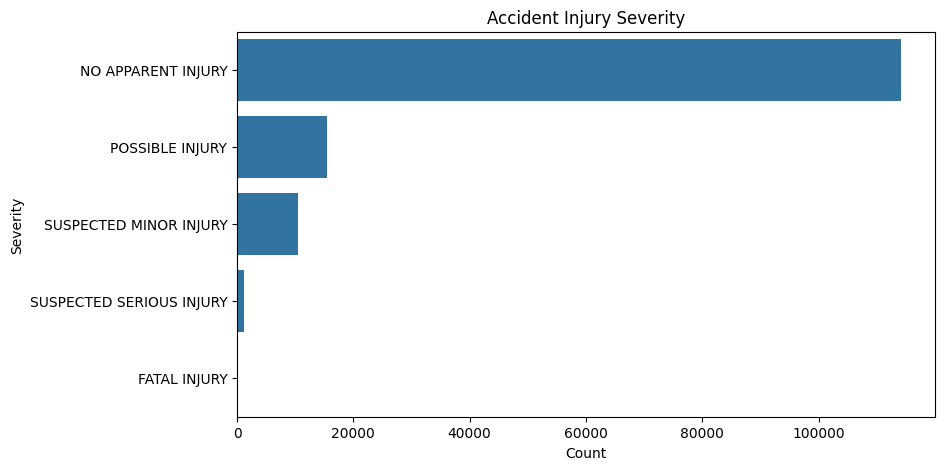

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


df = pd.read_csv("/content/crash_data.csv")


df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'], errors='coerce')
df['Hour'] = df['Crash Date/Time'].dt.hour

df = df.dropna(subset=[
    'Weather',
    'Surface Condition',
    'Injury Severity',
    'Latitude',
    'Longitude'
])


plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()


top_weather = df['Weather'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title("Top Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

plt.figure(figsize=(9,5))
sns.countplot(
    y='Surface Condition',
    data=df,
    order=df['Surface Condition'].value_counts().index
)
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Count")
plt.ylabel("Surface Condition")
plt.show()


plt.figure(figsize=(9,5))
sns.countplot(
    y='Injury Severity',
    data=df,
    order=df['Injury Severity'].value_counts().index
)
plt.title("Accident Injury Severity")
plt.xlabel("Count")
plt.ylabel("Severity")
plt.show()
